# South East Asian Countries Debt Analysis 

### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Getting the Relevant Data](#section2_1)
    * [Treatment of Missing Values](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [SEA Countries Distribution of Debt for the years 2012 to 2021](#section3_1)
    * [SEA Countries with the Highest and Lowest Average Debt ](#section3_2)
    * [SEA Countries Total Debt for the years 2012 to 2021](#section3_3)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>
The goal of this analysis is to analyze the external debt of low- and middle-income countries in South East Asia for the years 2012 to 2021. The objectives are the following:
- Get acquainted with the data
- Make the data analysis-ready by cleaning it and getting the relevant data
- Form research questions
- Analyze variables within the data to gain insights on these questions

### Data <a class="anchor" id="Data"></a>
The data for this analysis was retreived from the World Bank's [International Debt Statistics](https://datacatalog.worldbank.org/search/dataset/0038015/International-Debt-Statistics). International Debt Statistics (IDS) provides a timely and comprehensive data on the external debt in low- and middle-income countries.

#### Loading the Data <a class="anchor" id="section1_1"></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [112]:
df = pd.read_csv('IDS_ALLCountries_Data.csv')

#### Data Information  <a class="anchor" id="section1_2"></a>

Some immediate insights on the data are:
- There are 76,820 rows and 66 columns in the dataset..
- There is a total of 137 countries included in the dataset.
- The South East Asian Countries that have data included in the dataset are: __Philippines, Indonesia, Cambodia, Myanmar, Thailand, and Vietnam.__
- The column number 6 to column number 65 contains data that can be compiled into a single column.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76820 entries, 0 to 76819
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           76817 non-null  object 
 1   Country Code           76815 non-null  object 
 2   Counterpart-Area Name  76815 non-null  object 
 3   Counterpart-Area Code  76815 non-null  object 
 4   Series Name            76815 non-null  object 
 5   Series Code            76815 non-null  object 
 6   1970                   34740 non-null  float64
 7   1971                   35586 non-null  float64
 8   1972                   36240 non-null  float64
 9   1973                   37015 non-null  float64
 10  1974                   37552 non-null  float64
 11  1975                   38326 non-null  float64
 12  1976                   38764 non-null  float64
 13  1977                   39645 non-null  float64
 14  1978                   40283 non-null  float64
 15  19

In [114]:
df['Country Name'].nunique()

137

#### Data Cleaning <a class="anchor" id="cleaning"></a>

Since the dataset is large and there are a total of 136 countries, the first step on the data cleaning process is to get only the data of the South East Asian countries that were included in the dataset.

In [115]:
#get data for SEA countries and store it into a new variable
sea_countries = df[(df['Country Name']=='Philippines') | (df['Country Name'] == 'Indonesia')\
                  | (df['Country Name']== 'Cambodia') | (df['Country Name']== 'Myanmar')\
                  | (df['Country Name']== 'Thailand') | (df['Country Name']== 'Vietnam')].reset_index(drop=True)


###### Getting the Relevant Data <a class="anchor" id="section2_1"></a>

In [116]:
#I will take the columns that I need in my analysis and 
sea_countries = pd.melt(frame = sea_countries, id_vars = ['Country Name','Country Code',\
                'Series Code'], value_vars = ['2012', '2013', '2014',\
                '2015', '2016', '2017', '2018', '2019', '2020', '2021'], value_name = 'Debt in USD',\
                var_name = 'Year')
sea_countries.head()

,Country Name,Country Code,Series Code,Year,Debt in USD
0,Cambodia,KHM,DT.GPA.DPPG,2012,6.2654
1,Cambodia,KHM,DT.GPA.OFFT,2012,6.2654
2,Cambodia,KHM,DT.GPA.PRVT,2012,0.0000
3,Cambodia,KHM,DT.GRE.DPPG,2012,33.2161
4,Cambodia,KHM,DT.GRE.OFFT,2012,33.2161


In [117]:
sea_countries.dtypes

Country Name     object
Country Code     object
Series Code      object
Year             object
Debt in USD     float64
dtype: object

In [118]:
#I will change the data type of the column Year into integer
sea_countries['Year'] = sea_countries['Year'].astype(int)

sea_countries.dtypes

Country Name     object
Country Code     object
Series Code      object
Year              int32
Debt in USD     float64
dtype: object

In [119]:
sea_countries.describe(include='all')

,Country Name,Country Code,Series Code,Year,Debt in USD
count,34140,34140,34140,34140.000000,2.369300e+04
unique,6,6,569,NaN,NaN
top,Cambodia,KHM,DT.GPA.DPPG,NaN,NaN
freq,5690,5690,60,NaN,NaN
mean,NaN,NaN,NaN,2016.500000,5.603669e+09
std,NaN,NaN,NaN,2.872323,3.212223e+10
min,NaN,NaN,NaN,2012.000000,-3.063312e+10
25%,NaN,NaN,NaN,2014.000000,5.150500e+00
50%,NaN,NaN,NaN,2016.500000,1.264428e+08
75%,NaN,NaN,NaN,2019.000000,1.377973e+09


###### Treatment for Missing Values <a class="anchor" id="section2_2"></a>

In [120]:
#count missing values
sea_countries.isna().sum()

Country Name        0
Country Code        0
Series Code         0
Year                0
Debt in USD     10447
dtype: int64

In [121]:
sea_countries[sea_countries.isnull().any(axis=1)].head(10)

,Country Name,Country Code,Series Code,Year,Debt in USD
12,Cambodia,KHM,DT.AMT.BLAT.CB.CD,2012,NaN
13,Cambodia,KHM,DT.DIS.BLAT.CB.CD,2012,NaN
14,Cambodia,KHM,DT.DOD.BLAT.CB.CD,2012,NaN
15,Cambodia,KHM,DT.INT.BLAT.CB.CD,2012,NaN
16,Cambodia,KHM,DT.NFL.BLAT.CB.CD,2012,NaN
17,Cambodia,KHM,DT.NTR.BLAT.CB.CD,2012,NaN
18,Cambodia,KHM,DT.TDS.BLAT.CB.CD,2012,NaN
19,Cambodia,KHM,DT.AMT.BLTC.CB.CD,2012,NaN
20,Cambodia,KHM,DT.DIS.BLTC.CB.CD,2012,NaN
21,Cambodia,KHM,DT.DOD.BLTC.CB.CD,2012,NaN


The NaN values in the dataset will be replaced by the value 0. This is because the debts were categorized into 569 series codes, and each of these series codes have a frequency of 60. Therefore it is safe to assume that the NaN values in the `Debt in USD` column means that there is no debt incurred that can be categorized in some series code, hence it can be replaced with a value of 0.

In [122]:
#Since I only want to know the total debt for each country in the past decade,
#I can fill the nan values with 0
sea_countries['Debt in USD'] = sea_countries['Debt in USD'].fillna(0)

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

The variables that will be the focus of the EDA are `Country Name`, `Year`, and `Debt in USD`. The following research questions that the EDA seeks to answer are:
- What is the distribution of the debt for each countries between the years 2012-2021?
- Which country in South East Asia has the highest average debt? Which has the lowest average debt?
- Did the total debt of each countries in South East Asia increase within the decade?

##### SEA Countries Distribution of Debt for the years 2012 to 2021 <a class="anchor" id="section3_1"></a>

This section aims to answer the question:
      
      What is the distribution of the debt for each countries between the years 2012-2021?
      
The data distribution will be visualized using a side-by-side boxplots.

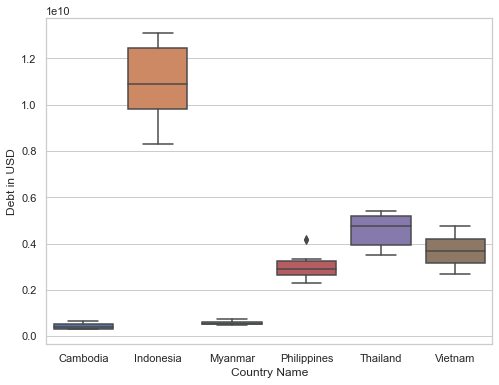

<Figure size 576x1152 with 0 Axes>

In [123]:
#create a variable that will store the total average debt of each countries for each year
country_total_debt = sea_countries.groupby(['Country Name', 'Year'])['Debt in USD'].mean().reset_index()

#visualize distribution using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data = country_total_debt, x = 'Country Name', y = 'Debt in USD')
plt.show()
plt.clf()

###### Analysis
Based on the boxplot above, the median of the Indonesia have the largest variation of data while Myanmar has the lowest variation of data. There is also an outlier in the Philippines' data distribution.

##### SEA Countries with the Highest and Lowest Average Debt <a class="anchor" id="section3_2"></a>

This section aims to answer the question:
    
    Which country in South East Asia has the highest average debt? Which has the lowest average debt?

First, the total average debt for each countries will be computed and then visualized using a bar chart. In addition, the average debt per year for each countries will also be computed and then visualized using a grouped bar chart.

In [124]:
#Find the total average debt of each country 
mean_debt = sea_countries.groupby('Country Name')['Debt in USD'].mean().reset_index()
mean_debt

,Country Name,Debt in USD
0,Cambodia,4.377227e+08
1,Indonesia,1.098337e+10
2,Myanmar,5.723110e+08
3,Philippines,3.070089e+09
4,Thailand,4.583340e+09
5,Vietnam,3.686684e+09


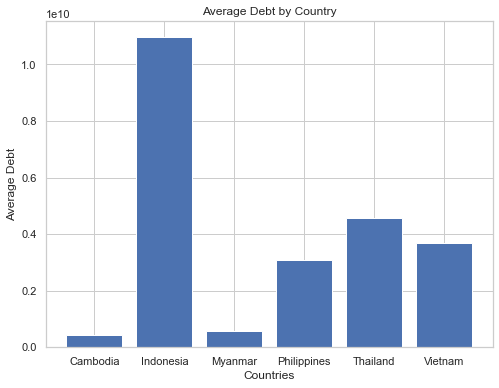

<Figure size 576x1152 with 0 Axes>

In [125]:
#Compare the total average debt of SEA countries
plt.figure(figsize=(8,6))
plt.bar(mean_debt['Country Name'], mean_debt['Debt in USD'])
plt.xlabel('Countries')
plt.ylabel('Average Debt')
plt.title('Average Debt by Country')
plt.show()
plt.clf()

In [126]:
#Find Average Debt per Year of each countries
mean_debt_peryr = sea_countries.groupby(['Country Name', 'Year'])['Debt in USD'].mean().reset_index()
mean_debt_peryr.head(10)

,Country Name,Year,Debt in USD
0,Cambodia,2012,3.103864e+08
1,Cambodia,2013,3.003950e+08
2,Cambodia,2014,3.246611e+08
3,Cambodia,2015,3.539868e+08
4,Cambodia,2016,3.569023e+08
5,Cambodia,2017,4.240500e+08
6,Cambodia,2018,4.996343e+08
7,Cambodia,2019,5.325870e+08
8,Cambodia,2020,6.128539e+08
9,Cambodia,2021,6.617700e+08


<Figure size 576x1152 with 0 Axes>

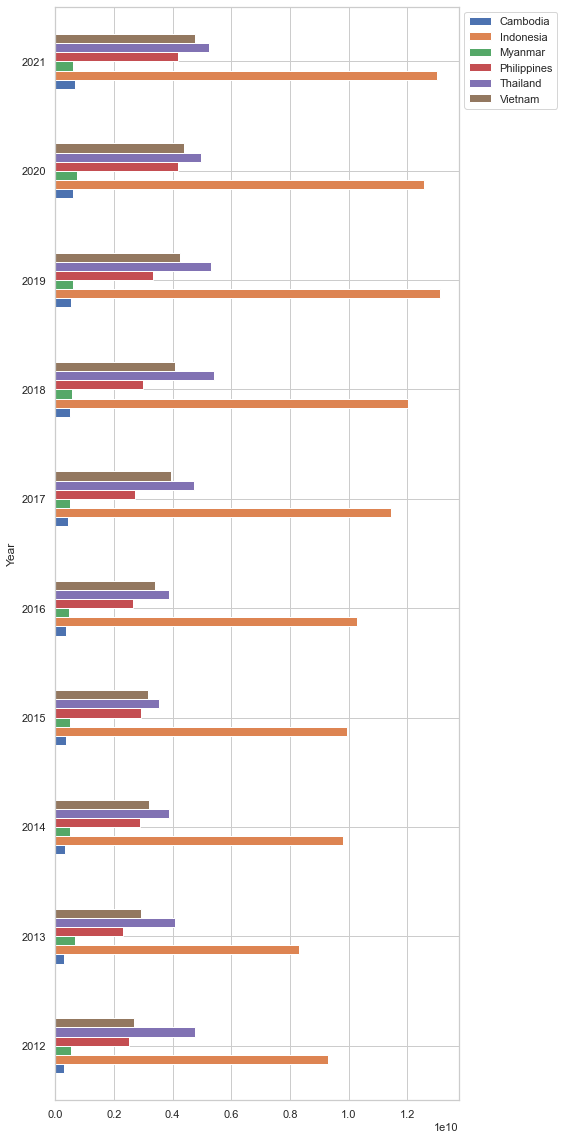

<Figure size 576x1152 with 0 Axes>

In [127]:
#Compare the Average debt of SEA countries each year
fig = plt.figure(figsize=(8, 16))
plt.rcParams["figure.figsize"]=(8, 16)
year_ave_debt = mean_debt_peryr.pivot(index='Year', columns= 'Country Name',
                      values = 'Debt in USD').plot.barh()
year_ave_debt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.tight_layout()
plt.show()
plt.clf()

###### Analysis
Based on the graphs above, Indonesia has the highest average total debt while Cambodia has the lowest average total debt. In addition, the average external debt of Indonesia per year has always been significantly higher compared to the rest of the countries in South East Asia. It is also importan to note that Myanmar also have a low level of external debt compared to the rest of the countries, except to Cambodia.

##### SEA Countries Total Debt for the years 2012 to 2021 <a class="anchor" id="section3_3"></a>

This section aims to answer the question:
    
    Did the total debt of each countries in South East Asia increase within the decade?
    
To answer this question, the debts incurred by the countries within a given year will be added and stored in a new variable. Then the trend will be visualized using line graphs.

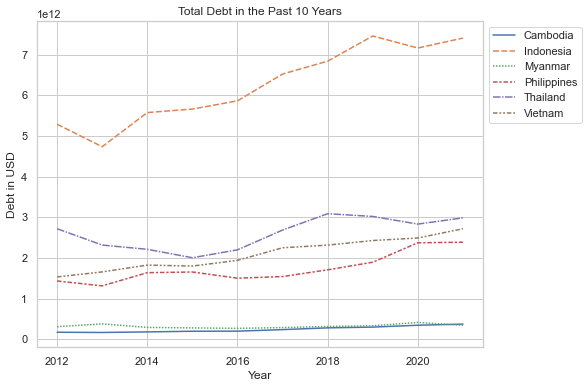

<Figure size 576x1152 with 0 Axes>

In [128]:
#Calculate total debt per year and visualize using line graph
def total_debt(df):
    data = df.groupby(['Country Name', 'Year'])['Debt in USD'].sum().reset_index()

    plt.figure(figsize=(8,6))
    sns.lineplot(data = data, x='Year', y='Debt in USD', hue = 'Country Name', style = 'Country Name')
    plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
    plt.title('Total Debt in the Past 10 Years')
    plt.show()

total_debt(sea_countries)
plt.clf()

<Figure size 576x1152 with 0 Axes>

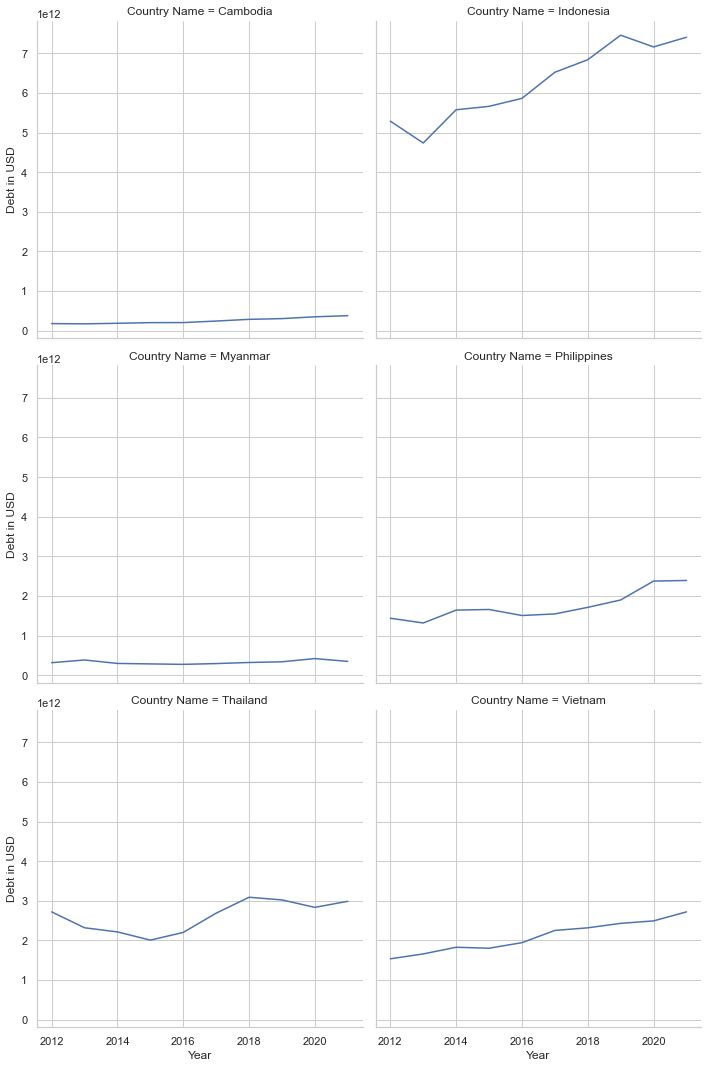

<Figure size 576x1152 with 0 Axes>

In [129]:
#Visualize trend for each countries
def debt(df):
    data = df.groupby(['Country Name', 'Year'])['Debt in USD'].sum().reset_index()

    fig = plt.figure()
    fig.suptitle('Total Debt in the Past 10 Years', fontsize=16)
    sns.relplot(
        data = data, x='Year', y='Debt in USD',
        col = 'Country Name', kind = 'line',col_wrap = 2,
    )
    for ax in fig.axes:
        ax.set_xlim(ax.get_ylim())
        ax.set_aspect('equal')
    
    plt.show()

debt(sea_countries)
plt.clf()

###### Analysis
The graphs above shows that the external debts of most of the countries in South East Asia were increasing over the years, except for Cambodia and Myanmar, which maintained a relatively stable level of external debt over the past 10 years.

### Conclusion <a class="anchor" id="conclusion"></a>
The analysis showed that the data distribution of the countries in South East Asia are different from each other. Among these countries, Indonesia has the highest external debt while Cambodia has the lowest external debt. Lastly, the analysis showed that the debt of each country increased for the past 10 years, except for Cambodia and Myanmar, which maintained a relatively stable level of debt.